In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:


# Load the dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [6]:
# Drop irrelevant features
df = df.drop(['customerID', 'TotalCharges'], axis=1)

# Convert categorical features to numerical features
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df[cat_cols] = df[cat_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No internet service': 0,
                                     'No phone service': 0, 'DSL': 1, 'Fiber optic': 2, 'Month-to-month': 0,
                                     'One year': 1, 'Two year': 2, 'Electronic check': 0, 'Mailed check': 1,
                                     'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})


In [7]:
# Split the dataset into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# linear regression

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False],
    'regressor__copy_X': [True, False]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

Best hyperparameters:  {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__normalize': True}
MSE:  0.1372211221170251
RMSE:  0.37043369462972064
R-squared:  0.2950239461488048


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [8]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error:  0.13722112211702497
Root Mean Squared Error:  0.3704336946297204
R-squared:  0.29502394614880545


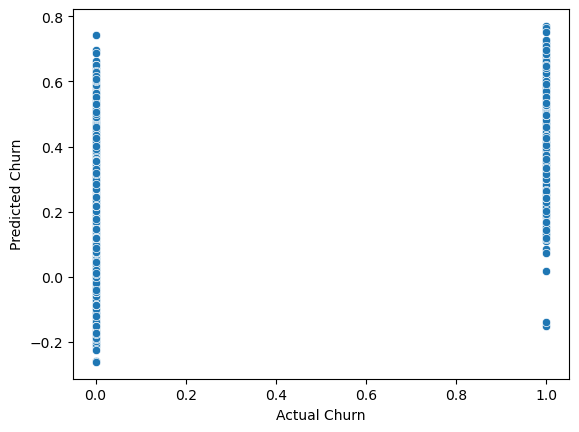

In [9]:


# Predict churn on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R-squared: ", r2)

# Visualize the results
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Churn')
plt.ylabel('Predicted Churn')
plt.show()

Ridge regressor

In [10]:
from sklearn.linear_model import Ridge


In [11]:

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False],
    'regressor__copy_X': [True, False]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight 

Best hyperparameters:  {'regressor__alpha': 1, 'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__normalize': False}
MSE:  0.13718984751307176
RMSE:  0.37039147872632244
R-squared:  0.2951846200052829


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

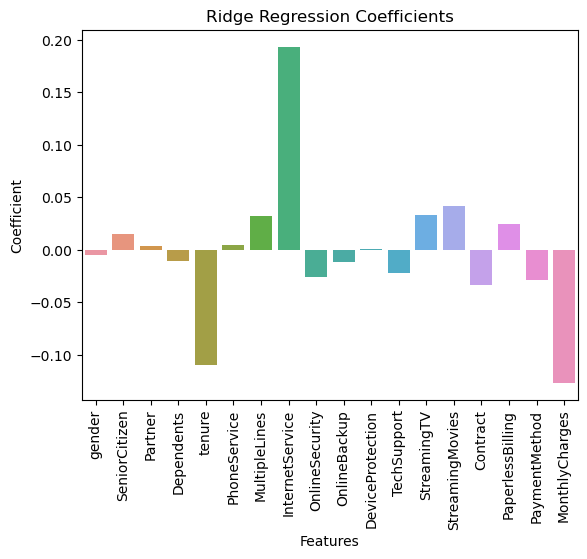

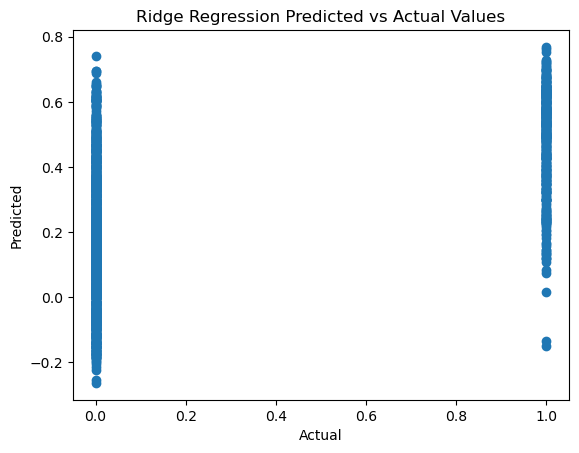

In [12]:
# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_
sns.barplot(x=X.columns, y=coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression Predicted vs Actual Values')
plt.show()

# lasso regression

In [13]:
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

# your code here

# reset warnings filter to default
#warnings.filterwarnings("default")


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Best hyperparameters:  {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 1000, 'regressor__normalize': False, 'regressor__precompute': False}
MSE:  0.1681368581811697
RMSE:  0.41004494653777857
R-squared:  0.13619378009158056


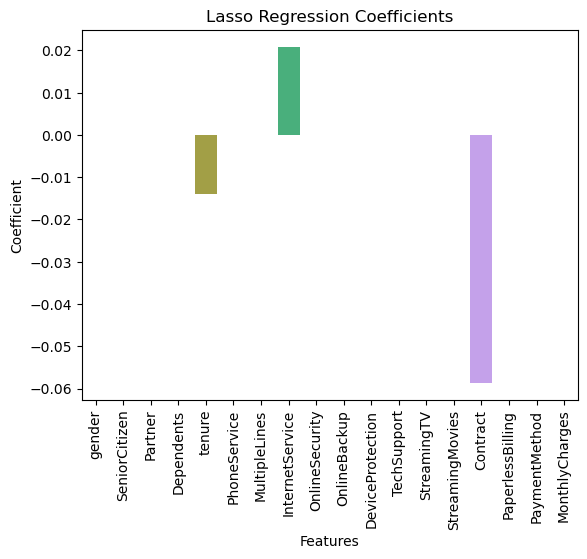

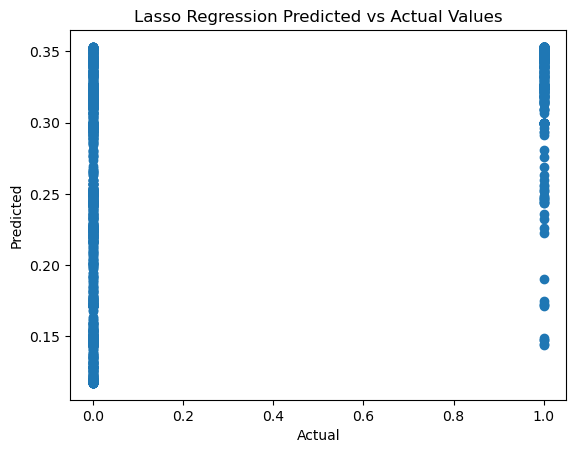

In [14]:
from sklearn.linear_model import Lasso

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False],
    'regressor__precompute': [True, False],
    'regressor__max_iter': [1000, 2000, 3000]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error',verbose=0)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_
sns.barplot(x=X.columns, y=coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression Predicted vs Actual Values')
plt.show()

Best hyperparameters:  {'regressor__normalize': True}
MSE:  0.1372211221170251
RMSE:  0.37043369462972064
R-squared:  0.2950239461488048


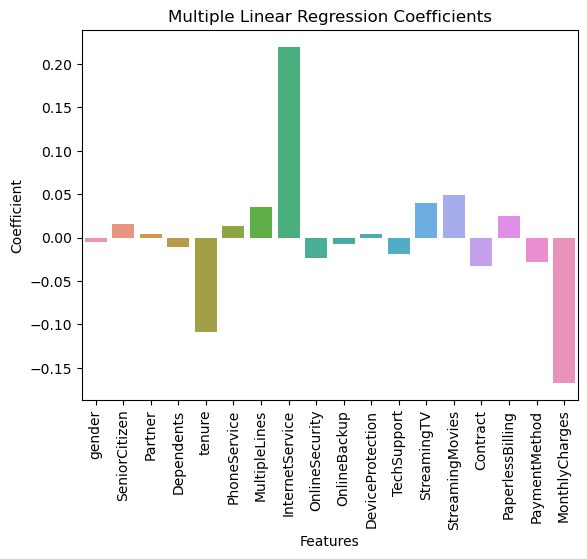

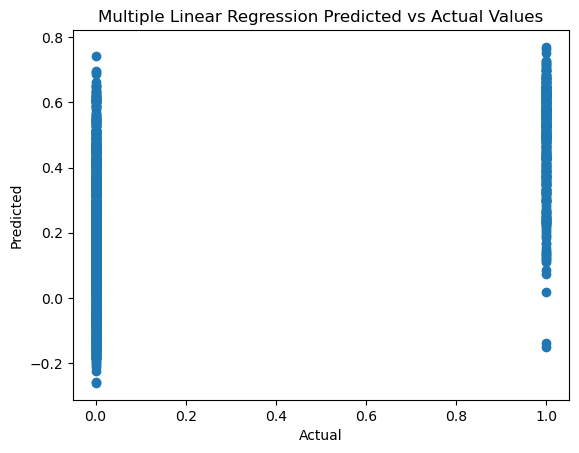

In [15]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__normalize': [True, False]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_
sns.barplot(x=X.columns, y=coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Multiple Linear Regression Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression Predicted vs Actual Values')
plt.show()

# ElasticNet Regression 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

Best hyperparameters:  {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.1, 'regressor__max_iter': 1000, 'regressor__normalize': False, 'regressor__precompute': False}
MSE:  0.1389771358182494
RMSE:  0.37279637312915126
R-squared:  0.2860023932675947


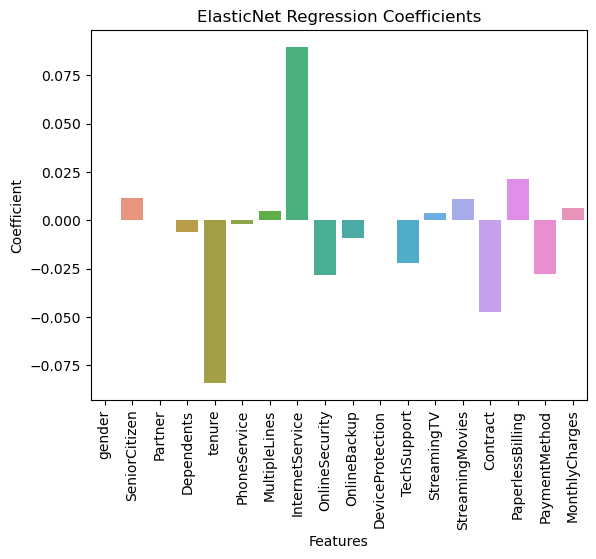

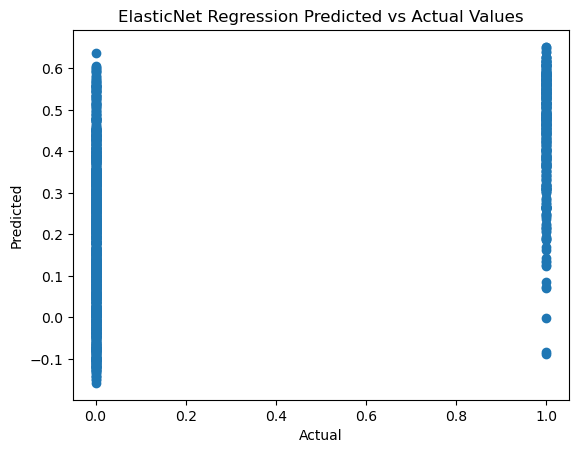

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [17]:
from sklearn.linear_model import ElasticNet

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.9],
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False],
    'regressor__precompute': [True, False],
    'regressor__max_iter': [1000, 2000, 3000]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_
sns.barplot(x=X.columns, y=coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('ElasticNet Regression Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ElasticNet Regression Predicted vs Actual Values')
plt.show()

# SVR with linear kernel

Best hyperparameters:  {'regressor__C': 1, 'regressor__epsilon': 0.3}
MSE:  0.13839008231773384
RMSE:  0.37200817506841677
R-squared:  0.28901839148862674


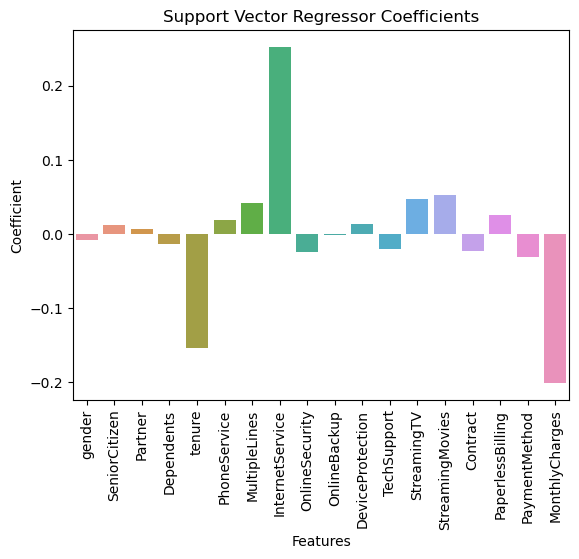

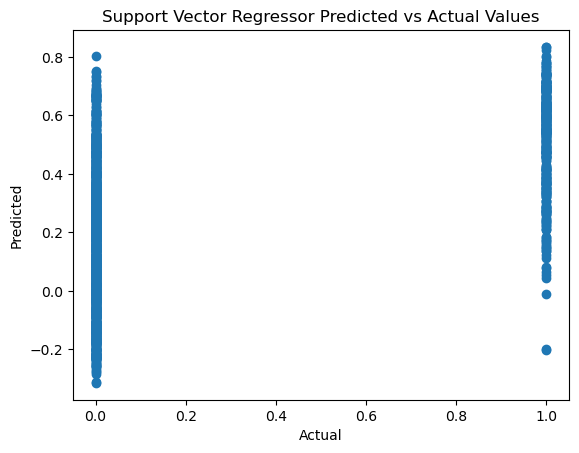

In [20]:
from sklearn.svm import SVR


# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR(kernel='linear'))
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.3, 0.4],
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_[0]
sns.barplot(x=X.columns, y=coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Support Vector Regressor Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regressor Predicted vs Actual Values')
plt.show()

# SGD Regressor

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureW

Best hyperparameters:  {'regressor__alpha': 0.01, 'regressor__loss': 'squared_loss', 'regressor__max_iter': 3000, 'regressor__penalty': 'elasticnet', 'regressor__tol': 1e-05}
MSE:  0.1375460093012388
RMSE:  0.3708719580950261
R-squared:  0.2933548322285843


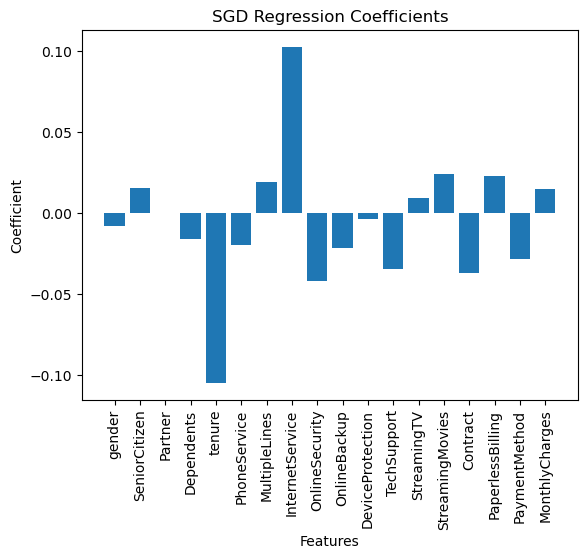

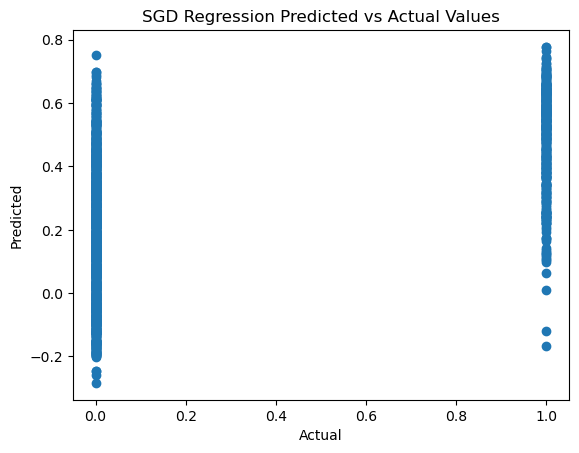

In [22]:
from sklearn.linear_model import SGDRegressor

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SGDRegressor())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'regressor__penalty': ['l1', 'l2', 'elasticnet'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__max_iter': [1000, 2000, 3000],
    'regressor__tol': [1e-3, 1e-4, 1e-5]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize coefficients
coefs = grid_search.best_estimator_.named_steps['regressor'].coef_
plt.bar(X.columns, coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('SGD Regression Coefficients')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SGD Regression Predicted vs Actual Values')
plt.show()

# SVR with RBF kernel

Best hyperparameters:  {'regressor__C': 0.1, 'regressor__epsilon': 0.1, 'regressor__gamma': 0.1}
MSE:  0.13887548294202814
RMSE:  0.37266000985083997
R-squared:  0.28652463680004414


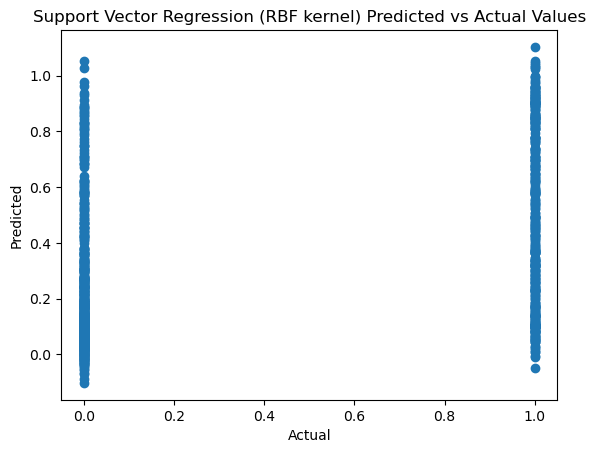

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureW

In [23]:
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR(kernel='rbf'))
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__C': [0.1, 1, 10],
    'regressor__gamma': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 1, 10]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression (RBF kernel) Predicted vs Actual Values')
plt.show()

# Polynomial regression

MSE:  0.13174362892072106
RMSE:  0.36296505192748385
R-squared:  0.3231646687937779


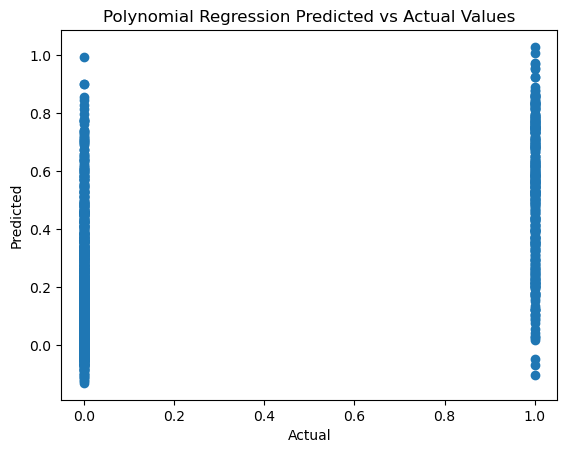

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


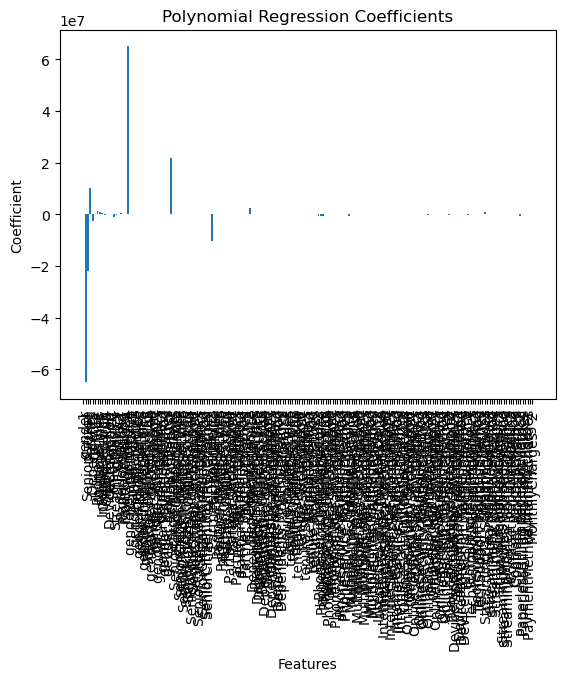

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predict on test set
y_pred = reg.predict(X_test_poly)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression Predicted vs Actual Values')
plt.show()

# Visualize feature importances
coefs = reg.coef_
plt.bar(poly.get_feature_names(X.columns), coefs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Polynomial Regression Coefficients')
plt.show()

Best hyperparameters:  {'poly__degree': 2, 'regressor__normalize': True}
MSE:  0.13174527024187205
RMSE:  0.36296731291105544
R-squared:  0.3231562364759958


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


ValueError: x and y must be the same size

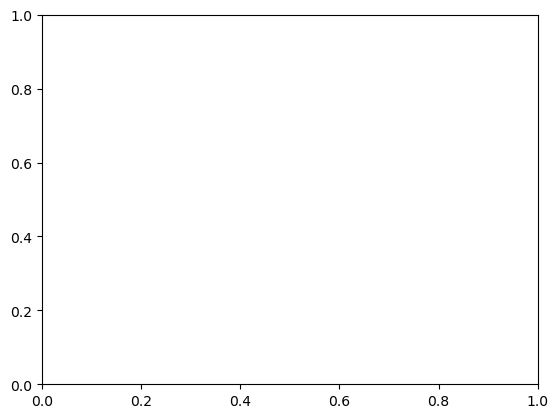

In [14]:
# Define pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

# Define hyperparameter grid
hyperparameters = {
    'poly__degree': [2, 3],#, 4],
    'regressor__normalize': [True]#, False]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize predicted vs actual values
plt.scatter(X_test, y_test, color='gray')
plt.scatter(X_test, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Visualize polynomial regression line
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, grid_search.predict(X_test), color='red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [16]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Define XGBoost regressor
xgb_reg = XGBRegressor()

# Define Gradient Boosting regressor
gb_reg = GradientBoostingRegressor()

# Define Random Forest regressor
rf_reg = RandomForestRegressor()

# Define hyperparameter grids for each regressor
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define grid search for each regressor
xgb_grid_search = GridSearchCV(xgb_reg, xgb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gb_grid_search = GridSearchCV(gb_reg, gb_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search = GridSearchCV(rf_reg, rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search for each regressor on training data
xgb_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

# Print best hyperparameters for each regressor
print('XGBoost Best hyperparameters: ', xgb_grid_search.best_params_)
print('Gradient Boosting Best hyperparameters: ', gb_grid_search.best_params_)
print('Define hyperparameter grids for each mode')

xgb_hyperparameters = {
'regressor__learning_rate': [0.01, 0.1],
'regressor__max_depth': [3, 5, 7],
'regressor__n_estimators': [50, 100, 200]
}
gb_hyperparameters = {
'regressor__learning_rate': [0.01, 0.1],
'regressor__max_depth': [3, 5, 7],
'regressor__n_estimators': [50, 100, 200]
}

rf_hyperparameters = {
'regressor__n_estimators': [50, 100, 200],
'regressor__max_depth': [3, 5, 7]
}


XGBoost Best hyperparameters:  {'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100, 'subsample': 1.0}
Define hyperparameter grids for each mode


In [19]:
print('Random forest Best hyperparameters: ', rf_grid_search.best_params_)

Random forest Best hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 300}


In [23]:
# # Define grid search objects for each model
# xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
# gb_grid_search = GridSearchCV(gb_pipeline, gb_hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
# rf_grid_search = GridSearchCV(rf_pipeline, rf_hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# # Fit grid search objects on training data
# xgb_grid_search.fit(X_train, y_train)
# gb_grid_search.fit(X_train, y_train)
# rf_grid_search.fit(X_train, y_train)

# # Print best hyperparameters for each model
# print('XGBoost Regressor Best Hyperparameters: ', xgb_grid_search.best_params_)
# print('Gradient Boosting Regressor Best Hyperparameters: ', gb_grid_search.best_params_)
# print('Random Forest Regressor Best Hyperparameters: ', rf_grid_search.best_params_)

# Evaluate models on test data and print metrics
models = [('XGBoost Regressor', xgb_grid_search), ('Gradient Boosting Regressor', gb_grid_search)]#,
          #('Random Forest Regressor', rf_grid_search)]
for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(name, 'MSE: ', mse)
    print(name, 'RMSE: ', rmse)
    print(name, 'R-squared: ', r2)

# Visualize feature importances for random forest regressor
importances = rf_grid_search.best_estimator_.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
#plt.title('Random Forest Regressor Feature Importances')
plt.show()

# Compare predicted vs actual values for each model
for name, model in models:
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values for Regression Models')
    plt.legend()
    plt.show()

XGBoost Regressor MSE:  0.12855680814891754
XGBoost Regressor RMSE:  0.35854819501556207
XGBoost Regressor R-squared:  0.3395370194740259
Gradient Boosting Regressor MSE:  0.1273058111475247
Gradient Boosting Regressor RMSE:  0.3567993990290969
Gradient Boosting Regressor R-squared:  0.34596403971562895


AttributeError: 'RandomForestRegressor' object has no attribute 'named_steps'

XGBoost Regressor MSE:  0.12855680814891754
XGBoost Regressor RMSE:  0.35854819501556207
XGBoost Regressor R-squared:  0.3395370194740259
Gradient Boosting Regressor MSE:  0.1273058111475247
Gradient Boosting Regressor RMSE:  0.3567993990290969
Gradient Boosting Regressor R-squared:  0.34596403971562895
Random Forest Regressor MSE:  0.12997569158415878
Random Forest Regressor RMSE:  0.36052141626283285
Random Forest Regressor R-squared:  0.3322474795721576


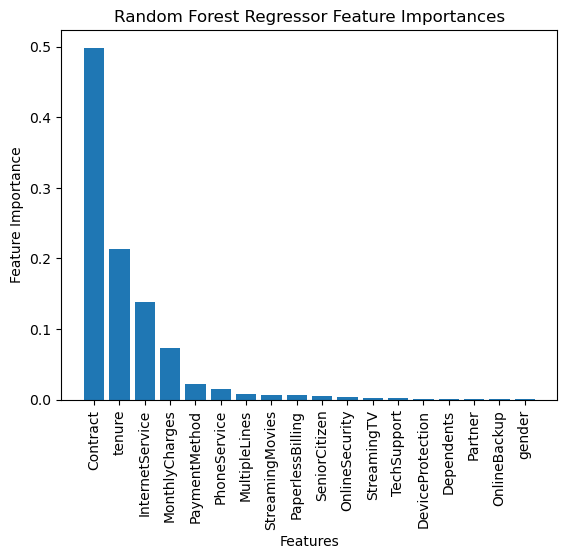

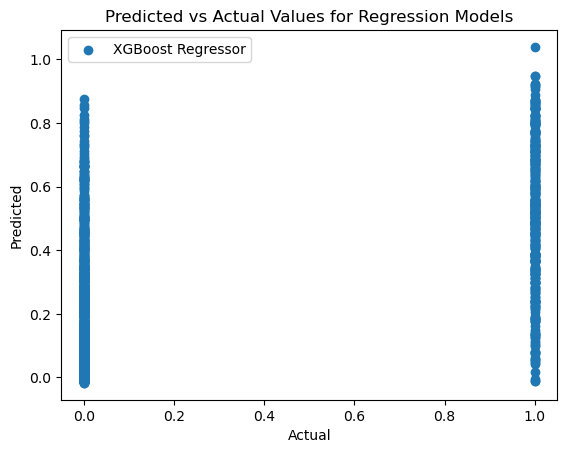

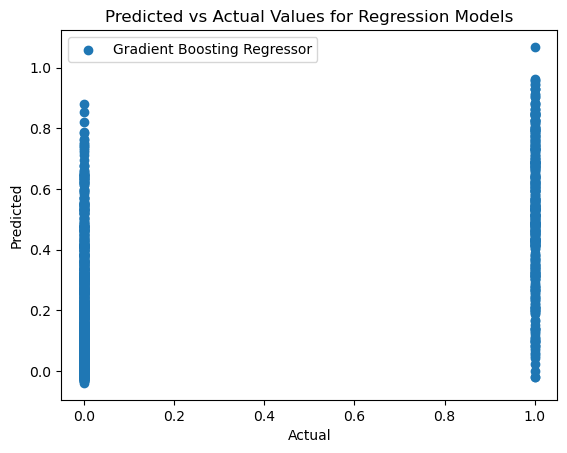

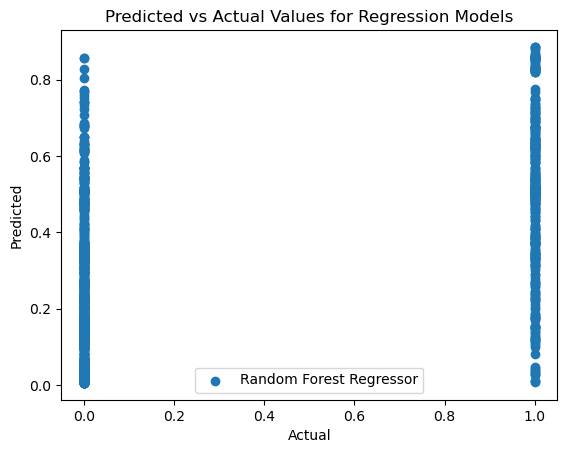

In [22]:
# Evaluate models on test data and print metrics
models = [('XGBoost Regressor', xgb_grid_search), ('Gradient Boosting Regressor', gb_grid_search),          ('Random Forest Regressor', rf_grid_search)]
for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(name, 'MSE: ', mse)
    print(name, 'RMSE: ', rmse)
    print(name, 'R-squared: ', r2)

# Visualize feature importances for random forest regressor
importances = rf_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Regressor Feature Importances')
plt.show()

# Compare predicted vs actual values for each model
for name, model in models:
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values for Regression Models')
    plt.legend()
    plt.show()



# xgboost
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__max_depth': [3, 4, 5],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 0.9],
    'regressor__gamma': [0, 1, 2]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize feature importances
feature_importances = grid_search.best_estimator_.named_steps['regressor'].feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual Values')
plt.show()

Best hyperparameters:  {'regressor__colsample_bytree': 0.9, 'regressor__gamma': 1, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
MSE:  0.12855680814891754
RMSE:  0.35854819501556207
R-squared:  0.3395370194740259


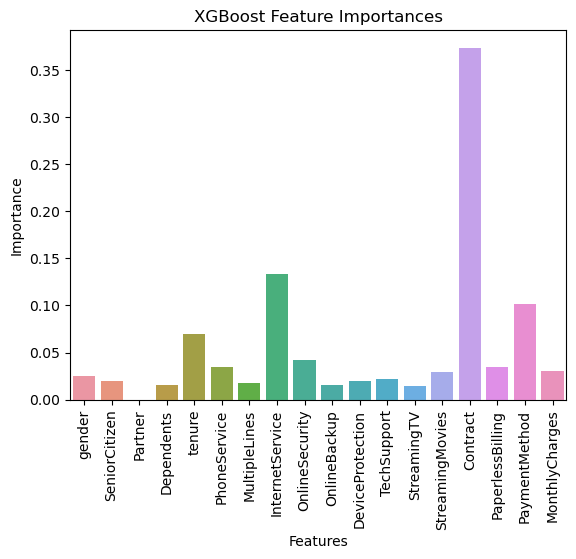

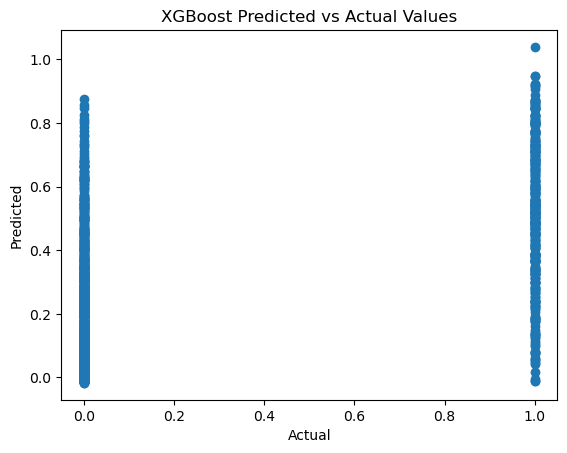

In [25]:

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

# Define hyperparameter grid
hyperparameters = {
    'regressor__max_depth': [3],
    'regressor__n_estimators': [100],
    'regressor__learning_rate': [0.1],
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree':  [0.9],
    'regressor__gamma': [1]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R-squared: ', r2)

# Visualize feature importances
feature_importances = grid_search.best_estimator_.named_steps['regressor'].feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Predicted vs Actual Values')
plt.show()

# Random forest


Best hyperparameters:  {'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 300}
Accuracy:  0.8041163946061036
Confusion Matrix:  [[965  71]
 [205 168]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



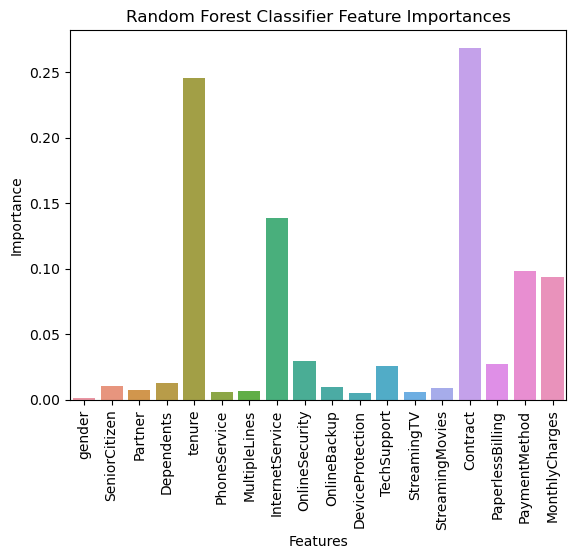

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameter grid
hyperparameters = {
    'classifier__max_depth': [5],
    'classifier__max_features': ['auto'],
    'classifier__min_samples_leaf': [3],
    'classifier__min_samples_split': [4],
    'classifier__n_estimators': [300]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Confusion Matrix: ', conf_matrix)
print('Classification Report: ', class_report)

# Visualize feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
sns.barplot(x=X.columns, y=importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Classifier Feature Importances')
plt.show()

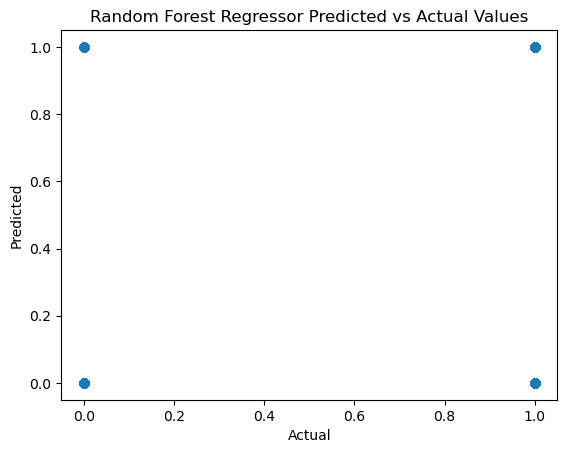

In [31]:
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor Predicted vs Actual Values')
plt.show()

# Gradient boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

# Define hyperparameter grid
hyperparameters = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3],
    'classifier__max_features': ['log2'],
    'classifier__subsample': [1.0]
}

# Define grid search
grid_search = GridSearchCV(pipeline, hyperparameters, cv=10, n_jobs=-1, scoring='accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters: ', grid_search.best_params_)

# Evaluate model on test data
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Accuracy: ', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Best hyperparameters:  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__max_features': 'log2', 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Accuracy:  0.815471965933286
Confusion Matrix:
 [[941  95]
 [165 208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



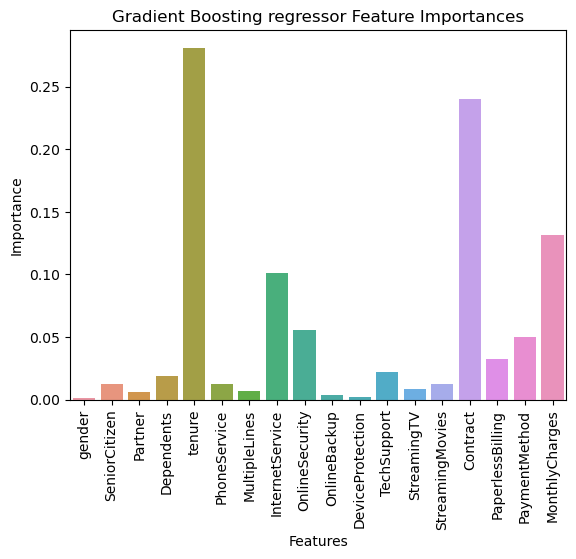

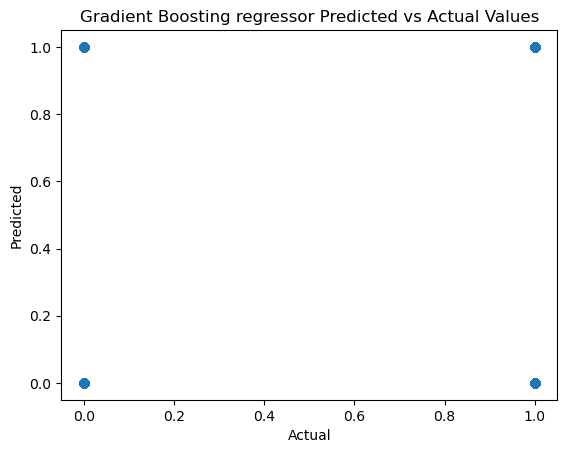

In [36]:
# Visualize feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
sns.barplot(x=X.columns, y=importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Gradient Boosting regressor Feature Importances')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting regressor Predicted vs Actual Values')
plt.show()
